# Code details

This section serves as a demonstration on how to use ExpansionSuite code to solve recursive models.

We start by assigning values to model parameters and defining equilibrium conditions. We decide to include the following variables as $X_t$ and $X_{t+1}$ in expansion. 

For the **no habit** specification (with preference shifter), the first **4** variables in the table below are considered as **jump variables**, and the last **3** are considered as **state variables**:

| Python Index | Code name | Corresponding $X_t$ variable| Code name | Corresponding $X_{t+1}$ variable| Category |
|:-:|:---------:|:---------:|:---------:|:---------:|:---------:|
|0|`vmcd_t`|$\log\left(\frac{V_t}{C_tD_t}\right)$|`vmc_tp1`|$\log\left(\frac{V_{t+1}}{C_{t+1}D_{t+1}}\right)$ | jump
|1|`rmcd_t`|$\log\left(\frac{R_t}{C_tD_t}\right)$|`rmc_tp1`|$\log\left(\frac{R_{t+1}}{C_{t+1}D_{t+1}}\right)$ | jump
|2|`cmk_t`|$\log\left(\frac{C_t}{K_t}\right)$|`cmk_tp1`|$\log\left(\frac{C_{t+1}}{K_{t+1}}\right)$ | jump
|3|`imk_t`|$\log\left(\frac{I_t}{K_t}\right)$|`imk_tp1`|$\log\left(\frac{I_{t+1}}{K_{t+1}}\right)$ | jump
|4|`gk_t`|$\log\left(\frac{K_t}{K_{t-1}}\right)$|`gy_tp1`| $\log\left(\frac{K_{t+1}}{K_t}\right)$| state
|5|`z1_t`|$Z_{1,t}$|`z1_tp1`|$Z_{1,t+1}$| state
|6|`z2_t`|$Z_{2,t}$|`z2_tp1`|$Z_{2,t+1}$| state

For the **internal habit** specification, the first **7** variables in the table below are considered as **jump variables**, and the last **4** are considered as **state variables**:

| Python Index | Code name | Corresponding $X_t$ variable| Code name | Corresponding $X_{t+1}$ variable| Category |
|:-:|:---------:|:---------:|:---------:|:---------:|:---------:|
|0|`vmh_t`|$\log\left(\frac{V_t}{H_t}\right)$|`vmh_tp1`|$\log\left(\frac{V_{t+1}}{H_{t+1}}\right)$ | jump
|1|`rmh_t`|$\log\left(\frac{R_t}{H_t}\right)$|`rmh_tp1`|$\log\left(\frac{R_{t+1}}{H_{t+1}}\right)$ | jump
|2|`umh_t`|$\log\left(\frac{U_t}{H_t}\right)$|`umh_tp1`|$\log\left(\frac{U_{t+1}}{H_{t+1}}\right)$ | jump
|3|`cmk_t`|$\log\left(\frac{C_t}{K_t}\right)$|`cmk_tp1`|$\log\left(\frac{C_{t+1}}{K_{t+1}}\right)$ | jump
|4|`imk_t`|$\log\left(\frac{I_t}{K_t}\right)$|`imk_tp1`|$\log\left(\frac{I_{t+1}}{K_{t+1}}\right)$ | jump
|5|`mhmu_t`|$\log\left(\frac{MH_t}{MU_t}\right)$|`mhmu_tp1`|$\log\left(\frac{MH_{t+1}}{MU_{t+1}}\right)$| jump
|6|`mcmu_t`|$\log\left(\frac{MC_t}{MU_t}\right)$|`mcmu_tp1`|$\log\left(\frac{MC_{t+1}}{MU_{t+1}}\right)$| jump
|7|`hmk_t`|$\log\left(\frac{H_t}{K_t}\right)$|`hmk_tp1`|$\log\left(\frac{H_{t+1}}{K_{t+1}}\right)$| state
|8|`gk_t`|$\log\left(\frac{K_t}{K_{t-1}}\right)$|`gy_tp1`| $\log\left(\frac{K_{t+1}}{K_t}\right)$| state
|9|`z1_t`|$Z_{1,t}$|`z1_tp1`|$Z_{1,t+1}$| state
|10|`z2_t`|$Z_{2,t}$|`z2_tp1`|$Z_{2,t+1}$| state 

## User Input 1: Equilibrium Conditions

In [1]:
import numpy as np
import autograd.numpy as anp

# Model parameters
γ = 10.
ρ = 1.5
β = np.exp(-0.005)
a = 0.0355
ϕ_1 = 0.0125
ϕ_2 = 400.
α_k = 0.025
U_k = np.array([1,0])
σ_k = np.array([0.477,0,0]) * 0.01
A = np.array([[np.exp(-0.014),0],[0,np.exp(-0.0022)]])
B = np.array([[0.011,0.025,0],[0,0,0.119]]) * 0.01

args = (γ, ρ, β, a, ϕ_1, ϕ_2, α_k, U_k, σ_k, A, B)

def eq_cond_no_habit(X_t, X_tp1, W_tp1, q, *args):
    # Parameters for the model
    γ, ρ, β, a, ϕ_1, ϕ_2, α_k, U_k, σ_k, A, B = args

    # Variables in X_t:
    # log V_t/C_t, log R_t/C_t,
    # log C_t/K_t, log I_t/K_t,
    # log (K_{t}/K_{t-1}), Z_{1,t}, Z_{2,t}
    vmc_t, rmc_t, cmk_t, imk_t, gk_t, z1_t, z2_t = X_t.ravel()
    vmc_tp1, rmc_tp1, cmk_tp1, imk_tp1, gk_tp1, z1_tp1, z2_tp1 = X_tp1.ravel()

    # Exogenous states
    Z_t = anp.array([z1_t, z2_t])
    Z_tp1 = anp.array([z1_tp1, z2_tp1])
    # Stochastic depreciation, capital growth and log ψ
    g_dep = -α_k + U_k.T@Z_t + σ_k.T@W_tp1
    log_ψ = anp.log(ϕ_1*ϕ_2) + (ϕ_1-1)*anp.log(1+ϕ_2*anp.exp(imk_t)) + g_dep
    # log SDF, excluding the change of measure
    sdf_ex = anp.log(β) + (ρ-1)*(vmc_tp1+cmk_tp1+gk_tp1-cmk_t-rmc_t) - ρ*(cmk_tp1+gk_tp1-cmk_t)

    # Marginals and pricing kernel
    mk_tp1 = vmc_tp1+cmk_tp1
    mc_tp1 = anp.log(1-β) + ρ*(vmc_tp1)
    log_Q = sdf_ex + mk_tp1 - mc_tp1

    # Eq0: Change of measure evaluated at γ=0
    m = vmc_tp1 + cmk_tp1 + gk_tp1 - cmk_t - rmc_t
    # Eq1: Recursive utility
    res_1 = (1-β) + β*anp.exp((1-ρ)*(rmc_t)) - anp.exp((1-ρ)*(vmc_t))
    # Eq2: FOC for consumption/investment
    res_2 = anp.exp(log_Q + log_ψ)
    # Eq3: Investment ratio
    res_3 = a - anp.exp(cmk_t) - anp.exp(imk_t)
    # Eq4: capital
    res_4 = gk_tp1 - ϕ_1 * anp.log(1+ϕ_2*anp.exp(imk_t)) - g_dep
    # Eq5-6: State process
    res_5 = (A@Z_t + B@W_tp1 - Z_tp1)[0]
    res_6 = (A@Z_t + B@W_tp1 - Z_tp1)[1]

    return anp.array([m, res_1,res_2,res_3,res_4,res_5, res_6])

## User Input 2: Steady states

After having parameters and equilibrium conditions defined, we also need to define a function that returns the deterministic steady state (0th order expansion) value of model variables.

For this model, the steady state is unique for a given parameter setting. Since it doesn't have a explicit solution, we decide to use a root solver numerical root solver to first solve the steady state of $\frac{C}{K}$, and then the steady state of other variables can all be solved from it. (Multivariate root solver doesn't perform very well in our case.) In the following implementation, bisection method (imported from `optimize.bisect`) is used.

In [2]:
from scipy import optimize

def ss_func_no_habit(*args):
    # Extra parameters for the model
    γ, ρ, β, a, ϕ_1, ϕ_2, α_k, U_k, σ_k, A, B = args

    # Optimize over c_t-k_t
    def f(cmk):
        # Level investment
        I = a - np.exp(cmk)
        # Capital growth
        g_k = ϕ_1 * np.log(1 + ϕ_2 * I) - α_k
        # Set growth rate to capital growth
        η = g_k
        # Increment in capital induced by a marginal decrease in consumption
        log_ψ =  np.log(ϕ_1) + np.log(ϕ_2) + (ϕ_1-1)*np.log(1 + ϕ_2 * I) - α_k
        # v
        vmc = (np.log(1-β) - np.log(1-β*np.exp((1-ρ)*η)))/(1-ρ)
        # sdf, note that sdf_c = sdf_u in steady states
        sdf = np.log(β) - ρ*η
        # log_Q
        mk_next = vmc+cmk
        mc_next = np.log(1-β) + ρ*vmc
        log_Q = mk_next - mc_next + sdf
        return np.exp(log_Q + log_ψ) - 1

    # Find roots
    cmk_star = optimize.bisect(f,-40,np.log(a))
    cmk = cmk_star

    # Calculate steady states
    z_1 = 0.
    z_2 = 0.
    Z = np.array([z_1,z_2])
    I = a - np.exp(cmk)
    g_k = ϕ_1 * np.log(1 + ϕ_2 * I) - α_k
    η = g_k
    
    # c, k, h, u, sdf, v, r, mu, mh, mc, imk
    vmc = (np.log(1-β) - np.log(1-β*np.exp((1-ρ)*η)))/(1-ρ)
    rmc = vmc + η
    imk = np.log(a - np.exp(cmk))

    X_0 = np.array([vmc,rmc,cmk,imk,g_k,z_1,z_2])
    return X_0

## Solving (Approximate) Equilibrium Law of Motion

Once we have the above two pieces of user inputs at hand, we are ready to apply small-noise expansion method to solve for (approximate) the equilibrium law of motion of every variable in the model. Let's first try a 1st order approximation.

In [3]:
from expansion import recursive_expansion

modelSol = recursive_expansion(eq_cond=eq_cond_no_habit,
                               ss=ss_func_no_habit,
                               var_shape=(4,3,3),
                               γ=args[0],
                               second_order=False,
                               args=args)
X_tp1 = modelSol.X_tp1

/var/folders/jc/9v589bkn7l71jxtqk_7k35l00000gp/T/ipykernel_77733/2167222835.py:18: RuntimeWarning: invalid value encountered in log
  vmc = (np.log(1-β) - np.log(1-β*np.exp((1-ρ)*η)))/(1-ρ)
/opt/anaconda3/lib/python3.8/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


The approximate law of motion given by small-noise expansion method takes the form of a familiar **linear state-space system**: It represents $X_{t+1}$, **all variables** (including both jump variables and state variables) at time $t+1$, only using **state variables** at time $t$ and **shock** at time $t+1$. 

If we partition $X_{t} = \begin{bmatrix} Y_t\\ Z_t\end{bmatrix}$ where $Y_t$ and $Z_t$ stand for time $t$ jump and state variables respectively, the first order approximation of $X_{t+1} $ should take the form

\begin{align*}
    Y_{t+1}^1 &= D Z_{t}^1 + F W_{t+1} + H\\
    Z_{t+1}^1 &= A Z_{t}^1 + B W_{t+1} + C
\end{align*}
or
\begin{equation*}
    X_{t+1}^1 = \begin{bmatrix} D\\A \end{bmatrix} Z_t^1 + \begin{bmatrix} F\\B \end{bmatrix} W_{t+1} + \begin{bmatrix} H\\C \end{bmatrix}
\end{equation*}

Let's print the first order coefficients out in the approximation that we just ran. You can easily tell what are the corresponding matrices $D$, $F$, $A$, $B$, $H$ and $C$. These coefficients are represented in a dictionary, so if you need the value of a specific coefficient matrix, you can conveniently extract it from the dictionary using the corresponding key 'c', 'w' or 'x'.

In [4]:
np.set_printoptions(precision=6,suppress=True)
modelSol.X1_tp1.coeffs # First order LOM coefficients

{'w': array([[ 0.004005,  0.009103,  0.      ],
        [ 0.004032,  0.009165,  0.      ],
        [ 0.001305,  0.002966,  0.      ],
        [-0.000792, -0.001799,  0.      ],
        [ 0.00477 ,  0.      ,  0.      ],
        [ 0.00011 ,  0.00025 ,  0.      ],
        [ 0.      ,  0.      ,  0.00119 ]]),
 'c': array([[-0.123193],
        [-0.124033],
        [-0.04014 ],
        [ 0.024351],
        [ 0.000273],
        [ 0.      ],
        [ 0.      ]]),
 'x': array([[-0.      , 35.904646,  0.      ],
        [-0.      , 36.149241,  0.      ],
        [-0.      , 11.698877,  0.      ],
        [ 0.      , -7.097123,  0.      ],
        [-0.      ,  0.91918 ,  0.      ],
        [ 0.      ,  0.986098,  0.      ],
        [ 0.      ,  0.      ,  0.997802]])}

With the law of motion at hand, it would be a piece of cake to perform tasks such as simulation, or compute important quantities that reflect the dynamics in the model, for example, impulse response functions. The ExpansionSuite code provides such functionalities.

## Simulation

Suppose we are interested in knowing how the model variable $\log(\frac{C_t}{K_t})$ evolves over time if it follows the (approximate) equilibrium law of motion. We just need to generate shocks throughout the horizon that we are interested in (for example, 100 periods), and feed the shocks to the `simulate` method of `modelSol`.

In the cell below, we first try 0 shocks (i.e. examine the deterministic path) and then try bivariate standard normal shocks. The graph of simulated paths shows that consumption has a lower deterministic growth rate than capital, this is as expected since we seek for a balanced growth path. After including stochastic growth component, the path oscillates around the deterministic path.

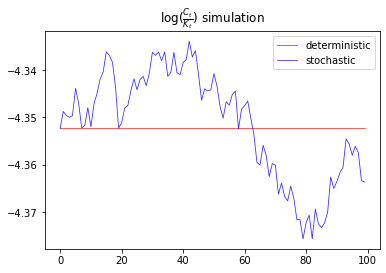

In [5]:
T = 100 # time horizon for simulation
_, _, n_W = modelSol.var_shape # the number of shocks within this model
Ws_1 = np.zeros((T,n_W)) # "generate" zero shocks throughout the horizon T=100
sim_result_1 = modelSol.simulate(Ws_1) # feed the generated shocks to the simulate method

Ws_2 = np.random.multivariate_normal(np.zeros(n_W), np.eye(n_W), size = T) # generate N(0,I) shocks
sim_result_2 = modelSol.simulate(Ws_2) # feed the generated shocks to the simulate method

import matplotlib.pyplot as plt
# sim_result contains the simulated value of all model variables over the specified horizon
# recall that we arranged log(C_t/K_t) as the 3rd jump variable, and python index starts from 0
plt.plot(sim_result_1[:,2], 'r', lw = .8, alpha = .8, label = 'deterministic') 
plt.plot(sim_result_2[:,2], 'b', lw = .8, alpha = .8, label = 'stochastic')
plt.legend()
plt.title(r'$\log(\frac{C_t}{K_t})$ simulation')
plt.show()

## Computing Impulse Response Functions

Below we showcase the impulse response functions of $\log\frac{K_{t+1}}{K_t}$ to each shock component, using the `IRF` method of the `modelSol` object, and then use `np.cumsum` to accumulate the responses, i.e. obtain the responses of $\log K_t$ at every t. (The same trick can be done to compute the responses of $\log C_t$).

We can see that both $W_1$ and $W_2$ have a permanent effect on capital growth, while $W_3$ doesn't affect capital growth. This is as expected from the parameters that we use for $\mathbb{U}_k$ and $\sigma_k$ in equilibrium condition (8).

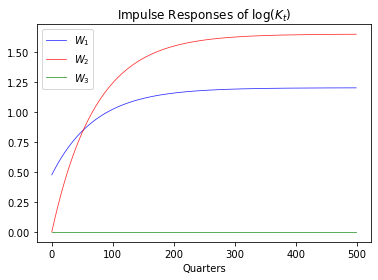

In [6]:
states_IRF = []
jumps_IRF = []
T = 500 # time horizon for IRF computation
for shock_index in [0,1,2]: # we have three shocks for this model
    states, jumps = modelSol.IRF(T, shock_index)
    states_IRF.append(states)
    jumps_IRF.append(jumps)

plt.plot(np.cumsum(states_IRF[0][:,0])*100, color='b', lw=0.8, alpha=0.8, label = "$W_1$")
plt.plot(np.cumsum(states_IRF[1][:,0])*100, color='r', lw=0.8, alpha=0.8, label = "$W_2$")
plt.plot(np.cumsum(states_IRF[2][:,0])*100, color='g', lw=0.8, alpha=0.8, label = "$W_3$")
plt.legend()
plt.xlabel("Quarters")
plt.title("Impulse Responses of $\log(K_t)$")
# plt.savefig("IncomeIRF", dpi = 300)
plt.show()

## Computing Elasticities

Computation in this part follows Borovička and Hansen (2014). User need to feed the law of motion of a variable of interest (most often this is log consumption) and the law of motion of a stochastic discount factor process to the code, named `C_growth` and `log_SDF` respectively in the following example. They are two main ingredients to follow Borovička and Hansen (2014) in elasticity computation.

`C_growth`, i.e. the law of motion of $\log \frac{C_{t+1}}{C_t}$, is extracted from the expansion solution of the whole model (note that since $\log C_t$ itself is not a model variable and we only have $\log \frac{C_{t+1}}{K_{t+1}}$ and $\log \frac{C_t}{K_t}$, we need to carefully eliminate the growth term $\log\frac{K_{t+1}}{K_t}$.

`log_SDF` is the law of motion of the log SDF process. Recall that 
\begin{equation}
\frac{S_{t+1}}{S_t} = \beta \left(\frac{V_{t+1}}{R_t}\right)^{1-\gamma} \left(\frac{V_{t+1}}{R_t}\right)^{\rho-1} \left(\frac{C_{t+1}}{C_t}\right)^{-\rho} \Rightarrow 
\log\frac{S_{t+1}}{S_t} = \log\beta + \left(1-\gamma\right)\left(\log V_{t+1}- \log R_t\right) + \left(\rho-1\right)\left(\log V_{t+1}- \log R_t\right) - \rho \left(\log C_{t+1} - \log C_t \right)
\end{equation}

so its law of motion can be expressed using the model solution. The `approximate_fun` method of the `modelSol` object achieves this goal. User needs to define a `log_SDF_ex` function (meaning log SDF process excluding change of measure term), just like the `log_SDF_ex_no_habit` defined below and feed it to `approximate_fun`. If the model being solved uses the internal habit preference instead, user will also need to specify a new `log_SDF_ex` function that conforms to the model specification.

Note: the log change of measure term, $\left(1-\gamma\right)\log \frac{V_{t+1}}{R_t}$, is a special term not taken into account by `approximate_fun`, and needs to be added separately, which is stored in `modelSol.log_M`.

In [7]:
def log_SDF_ex_no_habit(X_t, X_tp1, W_tp1, q, *args):
    γ, ρ, β, a, ϕ_1, ϕ_2, α_k, U_k, σ_k, A, B = args
    
    vmc_t, rmc_t, cmk_t, imk_t, gk_t, z1_t, z2_t = X_t.ravel()
    vmc_tp1, rmc_tp1, cmk_tp1, imk_tp1, gk_tp1, z1_tp1, z2_tp1 = X_tp1.ravel()

    sdf_ex = anp.log(β) + (ρ-1)*(vmc_tp1+cmk_tp1+gk_tp1-cmk_t-rmc_t) - ρ*(cmk_tp1+gk_tp1-cmk_t)
    
    return sdf_ex

In [8]:
log_SDF = modelSol.approximate_fun(log_SDF_ex_no_habit, args) + modelSol.log_M

/opt/anaconda3/lib/python3.8/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


In [9]:
X_growth = modelSol.X_tp1 - modelSol.X_t
X_growth_list = X_growth.split()
CmK_growth = X_growth_list[2]
K_growth = modelSol.X_tp1.split()[4]
C_growth = CmK_growth + K_growth

In [10]:
from elasticity import price_elasticity, exposure_elasticity
price = price_elasticity(C_growth, 
                         log_SDF,
                         modelSol.Z1_tp1,
                         None,
                         400,
                         0,
                         0.4)

exposure = exposure_elasticity(C_growth, 
                         modelSol.Z1_tp1,
                         None,
                         400,
                         0,
                         0.4)

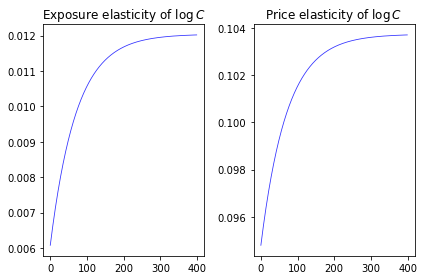

In [11]:
fig, axs = plt.subplots(1,2)
axs[0].plot(exposure, color='b', lw=0.8, alpha=0.8)
axs[0].set_title('Exposure elasticity of $\log C$')
axs[1].plot(price, color='b', lw=0.8, alpha=0.8)
axs[1].set_title('Price elasticity of $\log C$')
plt.tight_layout()
plt.show()

## References

[[1] Borovička, Jaroslav, and Lars Peter Hansen. "Examining macroeconomic models through the lens of asset pricing." Journal of Econometrics 183.1 (2014): 67-90.](http://larspeterhansen.org/wp-content/uploads/2016/10/Examining-Macroeconomic-Models-through-the-Lens-of-Asset-Pricing.pdf)

[[2] Eberly, Janice, and Neng Wang. 2009. "Capital Reallocation and Growth." American Economic Review, 99 (2): 560-66.](https://www.kellogg.northwestern.edu/faculty/eberly/htm/research/PP15.pdf)